In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [23]:
#Load MNIST dataset from keras.datasets
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [24]:
type(X_train)

numpy.ndarray

In [25]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [26]:
#all the images are grayscale images
#pixel range from 0 to 255
#Training data-60,000 images
#Test data-10,000 images
#Image dimension-28 x 28
#Grayscale Image-1 channel not 3 like RGB


In [27]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [28]:
print(X_train[10].shape)

(28, 28)


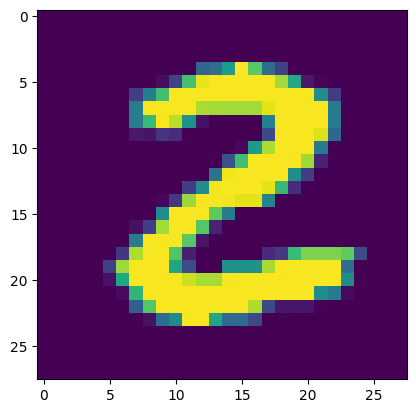

2


In [29]:
plt.imshow(X_train[25])
plt.show()

#print y-train, label
print(Y_train[25])

In [30]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [31]:
#unique values in y_train
print(np.unique(Y_train))
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [32]:
#all images have same dimension
#if not, resize to common dimension
#scaling values of data-scale from 0 to 1 instead of 0 to 255-colour intensity
X_train=X_train/255
X_test=X_test/255



In [33]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [34]:
#buiding an ANN
#setting up layers for ANN
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [35]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
#training neural network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2942 - accuracy: 0.9142
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1372 - accuracy: 0.9583
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1021 - accuracy: 0.9685
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0824 - accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0691 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0595 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0522 - accuracy: 0.9832
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0448 - accuracy: 0.9860
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0387 - accuracy: 0.9876
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.034

In [37]:
loss,accuracy=model.evaluate(X_test,Y_test)   #compare test data with ground truth labels using the model, and determine accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9731


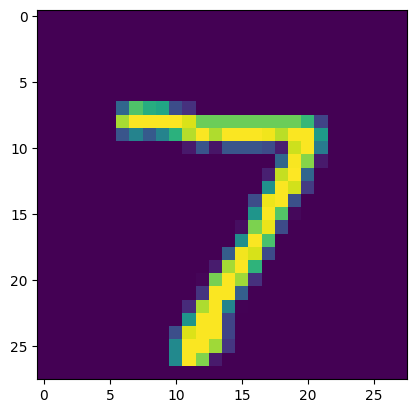

In [38]:
plt.imshow(X_test[0])

In [39]:
print(Y_test[0])

7


In [40]:
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [43]:
print(y_pred[0]) #each element tells, probability that the label is 0,1,2,3,4,5,6,7,8,9 i.e, for the data point

[1.6693794e-04 5.0091960e-02 4.9977517e-01 7.1235603e-01 7.5078127e-10
 2.6038247e-01 1.0701382e-03 9.9999708e-01 1.4804192e-01 1.1936767e-01]


In [44]:
#converting prediction probabilities to class labels
label_for_first_image=np.argmax(y_pred[0])
print(label_for_first_image)

7


In [45]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 7, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [46]:
print(y_pred)

[[1.6693794e-04 5.0091960e-02 4.9977517e-01 ... 9.9999708e-01
  1.4804192e-01 1.1936767e-01]
 [7.5009238e-04 9.0074372e-01 1.0000000e+00 ... 2.8343416e-05
  9.4584626e-01 5.2877439e-08]
 [7.4018080e-06 9.9987864e-01 2.5085461e-01 ... 5.1041955e-01
  6.6421199e-01 1.9401735e-02]
 ...
 [1.0541105e-13 1.9002504e-04 2.0907623e-07 ... 5.9457153e-01
  7.3810123e-05 9.6346223e-01]
 [2.9541584e-04 2.9875405e-04 2.1818191e-07 ... 1.8019136e-02
  9.9900562e-01 1.0247307e-05]
 [9.6601743e-06 1.5272839e-05 7.2320378e-05 ... 2.4552151e-07
  7.7185452e-01 1.9572124e-07]]


In [48]:
#y_test----> ground truth labels
#y_pred----> predicted by ML model

In [51]:
confusion=confusion_matrix(Y_test,y_pred_labels)

In [52]:
print(confusion)

tf.Tensor(
[[ 955    0    1    3    0    4   10    1    6    0]
 [   0 1125    5    0    0    2    1    0    2    0]
 [   0    3 1003    8    4    1    3    7    3    0]
 [   0    0    2  970    0   24    0    6    5    3]
 [   0    1    1    0  962    2    7    0    0    9]
 [   0    1    0    4    0  874    4    2    5    2]
 [   1    3    2    1    2   11  937    0    1    0]
 [   0    4   10    3    3    0    1 1003    2    2]
 [   0    0    3    6    5    6    1    3  947    3]
 [   0    4    0    2   24    9    1    8    6  955]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'True Labels')

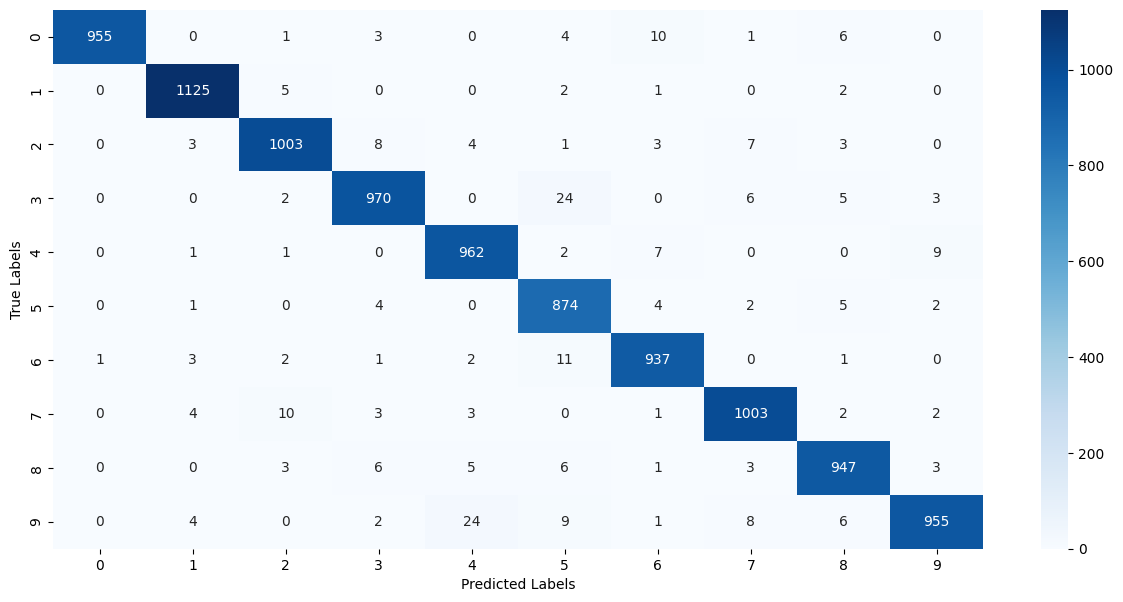

In [53]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [54]:
#955 images correctly classified as 0 by the model, third column is one image's true label is 0, but the model has incorrectly classified it as label 2

In [99]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [100]:
img=mpimg.imread('/content/MNIST_digit.png')

In [101]:
type(img)

numpy.ndarray

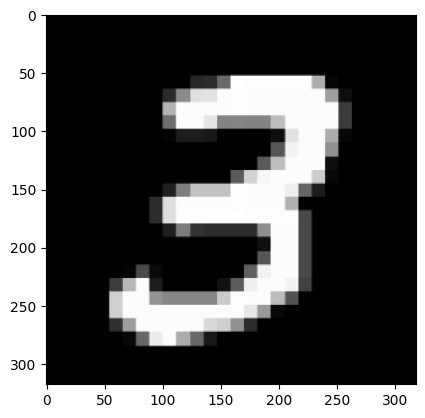

In [102]:
plt.imshow(img)

In [103]:
converted=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

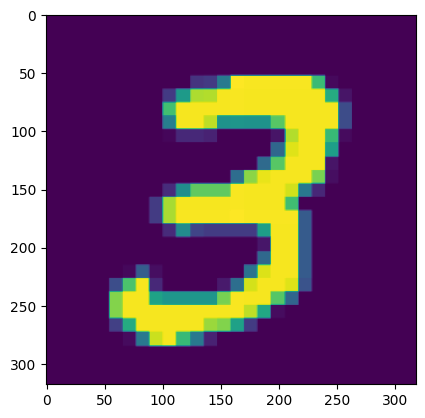

In [104]:
plt.imshow(converted)

In [105]:
input_img_resize=cv2.resize(converted,(28,28))

In [106]:
input_img_resize.shape

(28, 28)

In [107]:
print(input_img_resize)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [108]:
input_img_reshaped=np.reshape(input_img_resize,[1,28,28])

In [109]:
input_prediction=model.predict(input_img_reshaped)

1/1 [==============================] - 0s 23ms/step


In [110]:
print(input_prediction)

[[8.4253798e-11 2.4298000e-01 3.7048499e-03 1.0000000e+00 8.4902141e-11
  1.5726678e-02 1.4346807e-16 7.5297423e-02 4.3901289e-03 8.3150290e-02]]


In [111]:
true_value=np.argmax(input_prediction)

In [112]:
print(true_value)

3
